In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('daily-total-female-births-CA.xls',header=0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df['date'].dtype

dtype('O')

Loading data with parse_dates

In [5]:
#parse_dates=[0] ka matlab hai ki pehla column (index 0) ko date format me convert karna.
#Pandas us column ke data ko datetime format me change kar deta hai, jo aage analysis ke liye useful hota hai.

In [6]:
df2=pd.read_csv('daily-total-female-births-CA.xls',header=0,parse_dates=[0])

In [7]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
#Aapka output dtype('<M8[ns]') aa raha hai, iska matlab hai ki aapka date column 
#successfully datetime64 format me convert ho gaya hai.

In [9]:
df2['date'].dtype ##datetime64[ns] (if dates are stored as a specific date/time format that Pandas understands)

dtype('<M8[ns]')

Loading data as series

In [10]:
#header=0:

#Pehli row ko column names ke taur par use karta hai.
#parse_dates=[0]:

#Pehla column (index 0) ko datetime format me convert karta hai.
#index_col=0:

#Pehle column ko index bana deta hai.
#Agar pehla column date hai, toh aapke DataFrame me dates index ban jayenge, jo time series analysis ke liye bahut helpful hai.
#.squeeze("columns"):

#Agar DataFrame me sirf ek hi column bacha hai, toh usse ek Pandas Series me convert kar deta hai.
#Isse aapka data ek simple Series me aa jata hai, jisme index date hote hain aur values birth counts hoti hain.

In [11]:
series=pd.read_csv('daily-total-female-births-CA.xls',parse_dates=[0],header=0,index_col=0).squeeze("columns")

header=0:the first row is considered as the header.parse_date=[0]:the first column (data column) is parsed as a datatime object.index_col=0:the firstcolumn is set as the index.squeeze("columns"):converts a single-column dataframe into series

In [12]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

#exploring time series 

In [13]:
series.shape

(365,)

In [14]:
df2.shape

(365, 2)

Querying by time

In [15]:
print(series['1959-02'])

date
1959-02-01    23
1959-02-02    31
1959-02-03    44
1959-02-04    38
1959-02-05    50
1959-02-06    38
1959-02-07    51
1959-02-08    31
1959-02-09    31
1959-02-10    51
1959-02-11    36
1959-02-12    45
1959-02-13    51
1959-02-14    34
1959-02-15    52
1959-02-16    47
1959-02-17    45
1959-02-18    46
1959-02-19    39
1959-02-20    48
1959-02-21    37
1959-02-22    35
1959-02-23    52
1959-02-24    42
1959-02-25    45
1959-02-26    39
1959-02-27    37
1959-02-28    30
Name: births, dtype: int64


In [16]:
df2[(df2['date']>='1959-01-01')&(df2['date']<='1959-01-21')]

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


Descriptive statistics

In [17]:
df2.describe(include='all')

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [18]:
series.describe(include='all')

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

Feaure Engineering

Date time features

In [19]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [20]:
feature=df2.copy()

In [21]:
feature['year'] = df2['date'].dt.year

In [22]:
feature['month'] = df2['date'].dt.month

In [23]:
feature['day'] = df2['date'].dt.day

In [24]:
feature.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


Date:-20-02-25

Lag Features

Lag Feature ek time series me pichle (past) values ko represent karta hai.
Iska use mainly time series forecasting aur pattern recognition me hota hai.

In [25]:
#Agar aap lag=1 use karte hain, toh aap pichle din ki birth count ko current row ke saath add karte hain:

In [26]:
feature['lag2'] = df2['births'].shift(1) ## takes day as number in shift

In [27]:
feature.head(7)

,date,births,year,month,day,lag2
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,35.0
2,1959-01-03,30,1959,1,3,32.0
3,1959-01-04,31,1959,1,4,30.0
4,1959-01-05,44,1959,1,5,31.0
5,1959-01-06,29,1959,1,6,44.0
6,1959-01-07,45,1959,1,7,29.0


Window Feature

In [28]:
#Window Feature (ya Rolling Window) time series data me ek specific window size ke andar calculations karne me madad karta hai.
#Ye time series me moving average, rolling sum, rolling standard deviation, waqera calculate karne ke liye use hota hai.

In [29]:
feature['Roll_mean']=df2['births'].rolling(window=2).mean()

In [30]:
feature.head(5)

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,33.5
2,1959-01-03,30,1959,1,3,32.0,31.0
3,1959-01-04,31,1959,1,4,30.0,30.5
4,1959-01-05,44,1959,1,5,31.0,37.5


In [31]:
#(32+35)/2 rows 1

In [32]:
feature['Roll_max'] = df2['births'].rolling(window=3).max()

In [33]:
feature.head(7)

,date,births,year,month,day,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,37.5,44.0
5,1959-01-06,29,1959,1,6,44.0,36.5,44.0
6,1959-01-07,45,1959,1,7,29.0,37.0,45.0


Expanding feature

In [34]:
#Expanding Feature ek time series me shuruaat se lekar current point tak saare data points ko consider karta hai.
#Iska use cumulative calculations ke liye hota hai, jaise:

#Cumulative Sum (cumsum)
#Cumulative Mean (expanding().mean())


In [35]:
feature['Expand_max']=df2['births'].expanding().max()

In [36]:
feature.head(7)

,date,births,year,month,day,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,37.0,45.0,45.0


Resampling

upsampling
downsampling

In [37]:
#Resampling ka matlab hai time series data ki frequency ko badalna ya kam karna:

#Upsampling: Data points badhayein (e.g., Daily → Hourly)
#Downsampling: Data points kam karein (e.g., Daily → Weekly)

In [38]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [39]:
miles_df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [40]:
#DownSampling

In [41]:
quartely_miles_df = miles_df.resample('q',on='Month').mean()

In [42]:
quartely_miles_df

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667
1964-06-30,9229.333333
1964-09-30,10748.333333
1964-12-31,8132.000000
1965-03-31,8336.000000


Date:- 24-2-25

In [43]:
yearly_total_miles_df=miles_df.resample('Y',on='Month').sum()

In [44]:
yearly_total_miles_df.head()


,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


Upsampling

In [45]:
upsampled_miles_df=miles_df.resample('D',on='Month').mean()

In [46]:
upsampled_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [47]:
interpolated_miles_df=upsampled_miles_df.interpolate(method='linear') ## assumption of new data points in between two known discrete data set to find out all the value through curve known as linear curve

In [48]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


Time series - data Visualization

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
#Jab bhi aap matplotlib ka use karke graphs ya plots banate ho, toh:

#Without %matplotlib inline: Plot ek alag window me open ho sakta hai.
#With %matplotlib inline: Plot directly notebook ke andar hi dikhai dega.

In [51]:
Dataviz_df=df2.copy()

In [52]:
Dataviz_df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<Axes: >

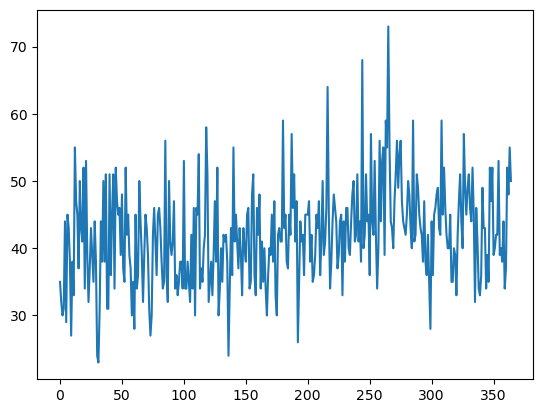

In [53]:
Dataviz_df['births'].plot()

In [54]:
Dataviz_df.describe()

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [55]:
Dataviz_df.index = Dataviz_df['date']

<Axes: xlabel='date'>

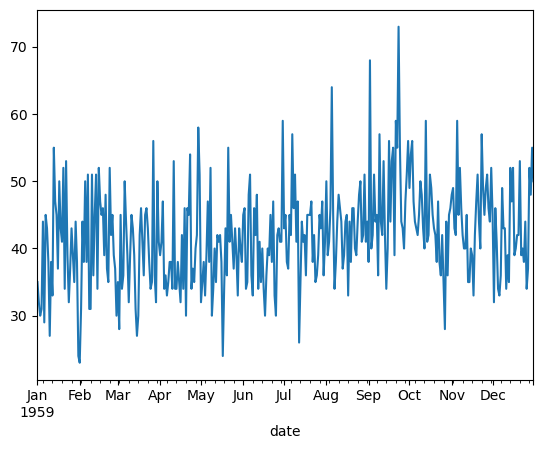

In [56]:
Dataviz_df['births'].plot()

Zooming IN

In [57]:
Dataviz_df2=Dataviz_df[(Dataviz_df['date'] > '1959-01-01')&(Dataviz_df['date'] <= '1959-1-10')].copy() ## year-month-date for eg:- 1959-01-01 ## taking the smaller data from big data for visualization

In [58]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<Axes: xlabel='date'>

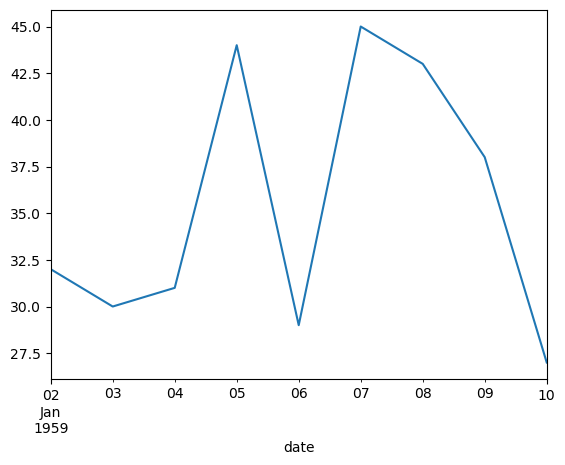

In [59]:
Dataviz_df2['births'].plot()


Trendline

In [60]:
import seaborn as sns

<Axes: ylabel='births'>

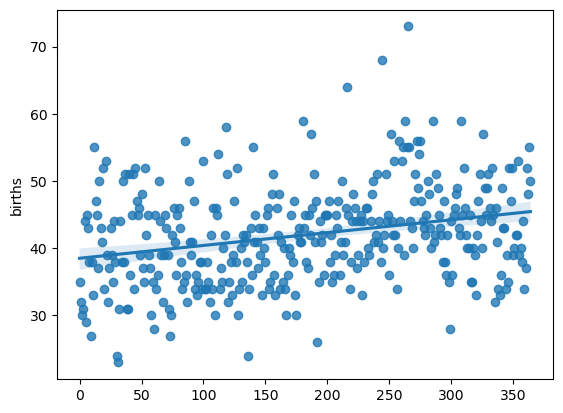

In [61]:
sns.regplot(x=df2.index.values,y=df2['births'])

<Axes: ylabel='births'>

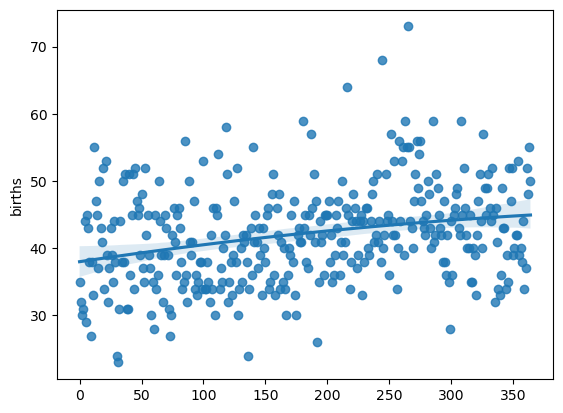

In [62]:
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [63]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [64]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

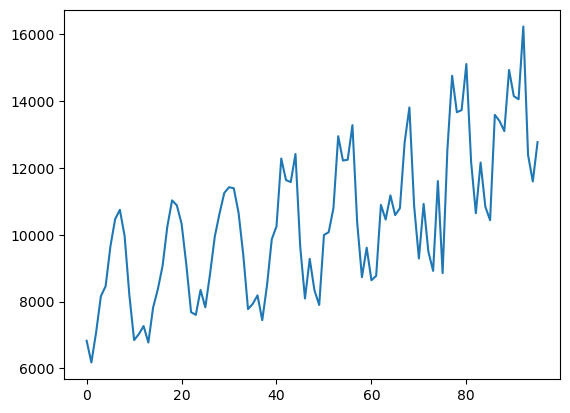

In [65]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

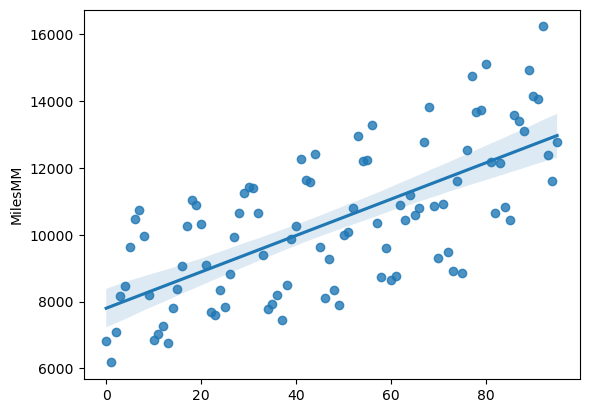

In [66]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

<Axes: ylabel='MilesMM'>

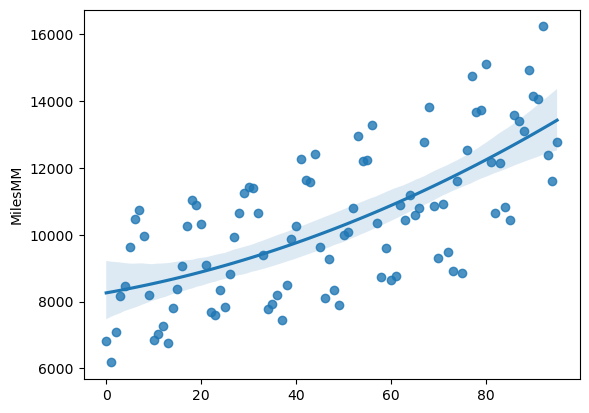

In [67]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'],order=2)

In [68]:
## what are the components of time series

In [69]:
#REMOVING SEASONALITY

In [70]:
#Seasonality ek repeating pattern hota hai jo specific time intervals par data me appear hota hai. Example:

#Daily: Har din morning me zyada sales.
#Weekly: Har weekend me shopping zyada hoti hai

In [71]:
miles_df['year'] = miles_df['Month'].dt.year

In [72]:
miles_df

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963
...,...,...,...
91,1970-08-01,14057,1970
92,1970-09-01,16234,1970
93,1970-10-01,12389,1970
94,1970-11-01,11595,1970


In [73]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

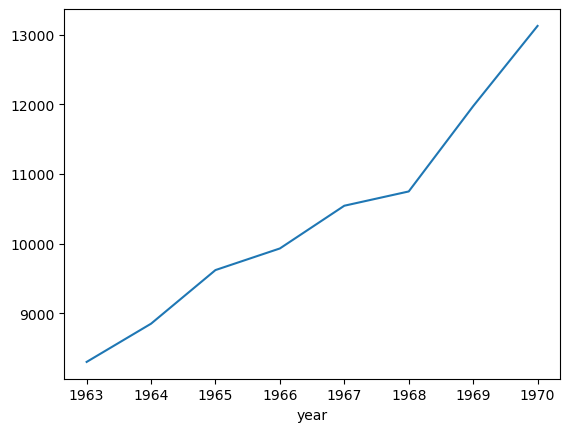

In [74]:
miles_df.groupby('year')['MilesMM'].mean().plot()

# creating lag plots

In [85]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [86]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

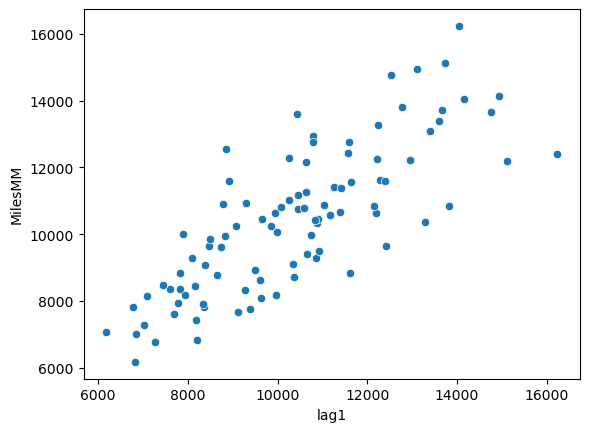

In [87]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [88]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

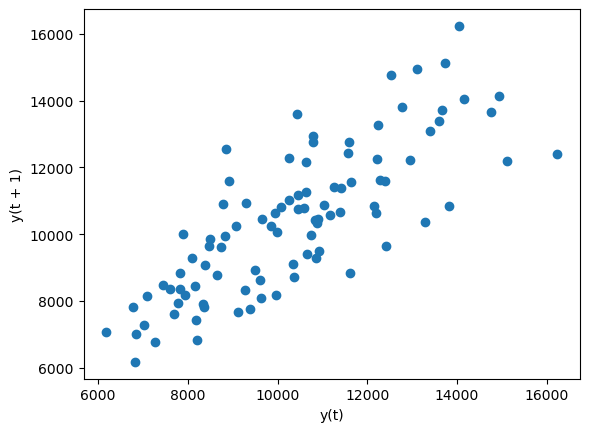

In [89]:
lag_plot(miles_df['MilesMM'])

In [90]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

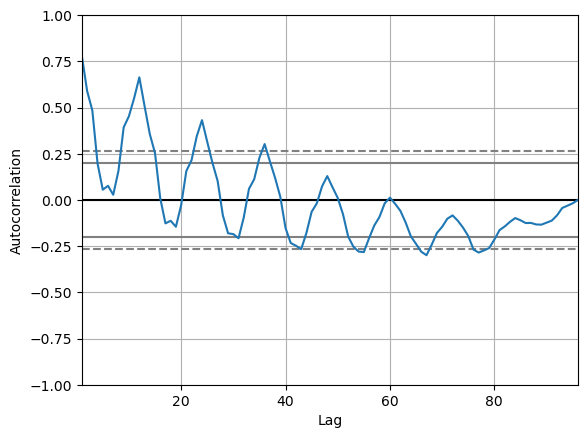

In [91]:
autocorrelation_plot(miles_df['MilesMM'])